In [23]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
titanic_df = pd.read_csv('Desktop/Data Science/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### __1st Problem statement : Who were the passengers in the titanic?__

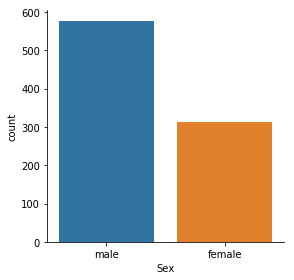

In [102]:
sns.factorplot('Sex',data = titanic_df,kind = 'count')

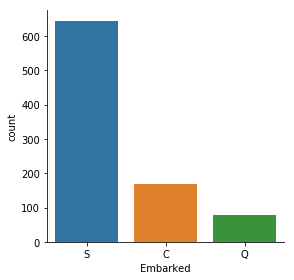

In [5]:
sns.factorplot('Embarked',data = titanic_df,kind = 'count')

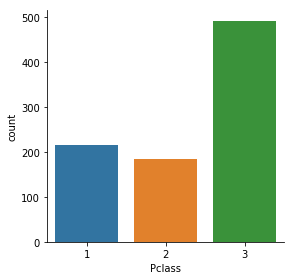

In [6]:
sns.factorplot('Pclass',data = titanic_df,kind = 'count')

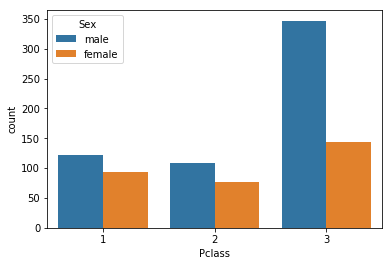

In [7]:
sns.countplot('Pclass',data=titanic_df,hue = 'Sex')

In [57]:
def male_female_child(passenger):
    age,sex = passenger
    if age < 16:
        return 'Child'
    else:
        return sex
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis = 1)

In [28]:
titanic_df[0:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child


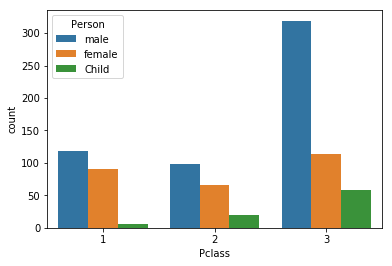

In [29]:
sns.countplot('Pclass',data=titanic_df,hue='Person')

male      537
female    271
Child      83
Name: Person, dtype: int64

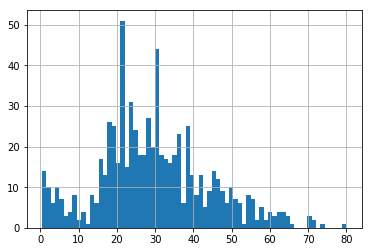

In [11]:
titanic_df['Age'].hist(bins=70)
titanic_df['Person'].value_counts()

In [61]:
titanic_df['Age'].mean()

29.69911764705882

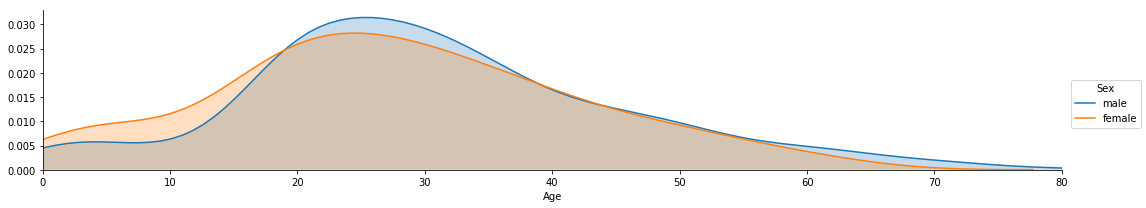

In [58]:
fig = sns.FacetGrid(titanic_df, hue = 'Sex', aspect = 5)
fig.map(sns.kdeplot,'Age',shade = True)
oldest  = titanic_df['Age'].max()
fig.set(xlim = (0,oldest))
fig.add_legend()

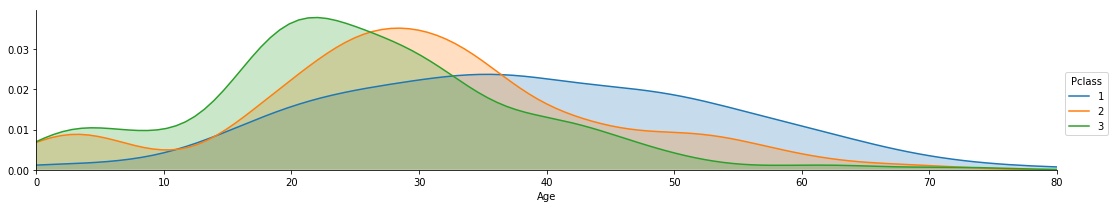

In [31]:
fig = sns.FacetGrid(titanic_df, hue = 'Pclass', aspect = 5)
fig.map(sns.kdeplot,'Age',shade = True)
oldest  = titanic_df['Age'].max()
fig.set(xlim = (0,oldest))
fig.add_legend()

### __What deck were the passengers on, and how does it relate to the Class__

In [59]:
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

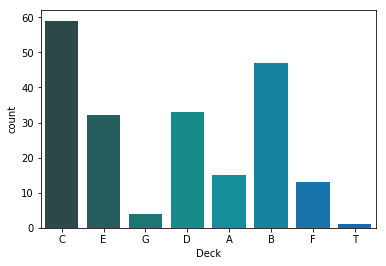

In [60]:
levels = []

for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels)
cabin_df.columns = ['Deck']
sns.countplot('Deck',data = cabin_df,palette= 'winter_d' )

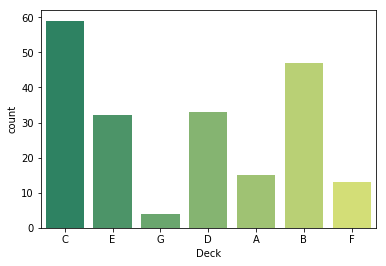

In [62]:
cabin_df = cabin_df[cabin_df.Deck != 'T']
sns.countplot('Deck',data = cabin_df,palette= 'summer' )

In [63]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


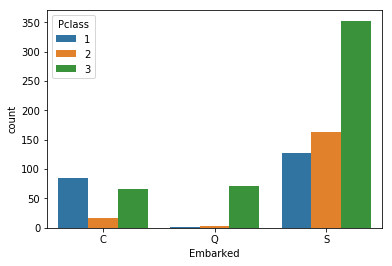

In [64]:
sns.countplot('Embarked', data = titanic_df,hue= 'Pclass',order = ['C','Q','S'])

### __Who was alone and Who was with family__ ##

In [65]:
titanic_df['family'] = titanic_df['Parch'] + titanic_df['SibSp']

In [37]:
titanic_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child,1


In [66]:
titanic_df.rename(columns = {'family':'Alone'},inplace = True)

In [67]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0


In [68]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'
titanic_df.head()

C:\Users\Nivedhu.A\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


Alone          537
With family    354
Name: Alone, dtype: int64

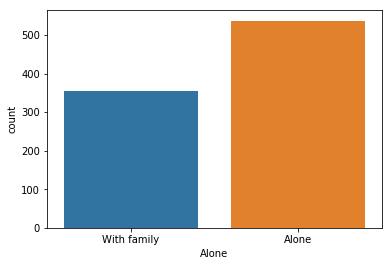

In [103]:
sns.countplot('Alone', data=titanic_df)
titanic_df['Alone'].value_counts()

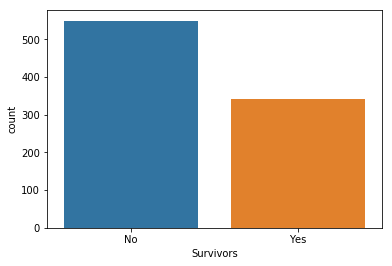

In [70]:
titanic_df['Survivors'] = titanic_df.Survived.map({0:'No',1:'Yes'})
sns.countplot('Survivors',data = titanic_df)

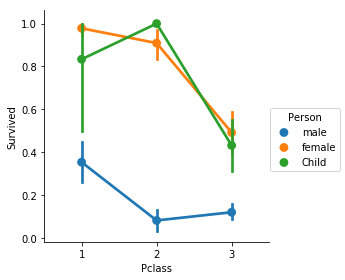

In [71]:
sns.factorplot('Pclass','Survived',hue = 'Person',data=titanic_df)

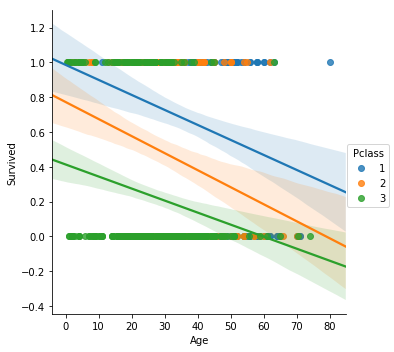

In [59]:
sns.lmplot('Age','Survived',hue = 'Pclass',data = titanic_df)

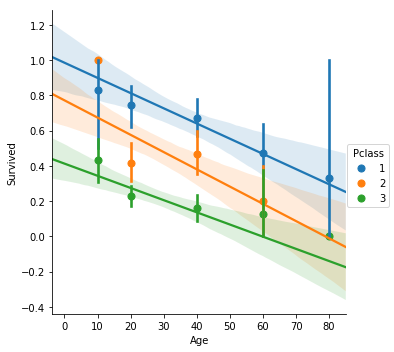

In [47]:
generation = [10,20,40,60,80]
sns.lmplot('Age','Survived',hue = 'Pclass',data = titanic_df, x_bins = generation)

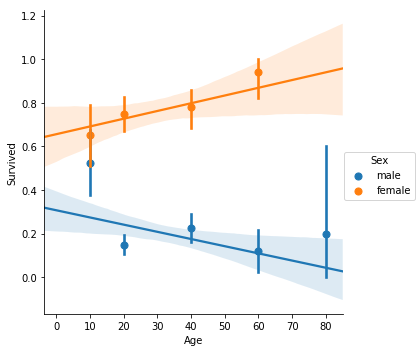

In [72]:
sns.lmplot('Age','Survived',hue = 'Sex',data = titanic_df, x_bins = generation)

In [90]:
titanic_df = pd.concat([titanic_df,cabin_df],axis = 1)

In [91]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivors,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family,No,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes,E
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family,Yes,G
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No,C
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone,No,D
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,No,A
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child,With family,No,C
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With family,Yes,B
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child,With family,Yes,D


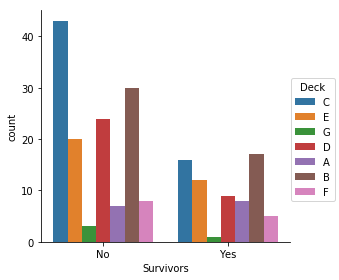

In [94]:
sns.factorplot('Survivors',data = titanic_df,hue = 'Deck',kind = 'count')

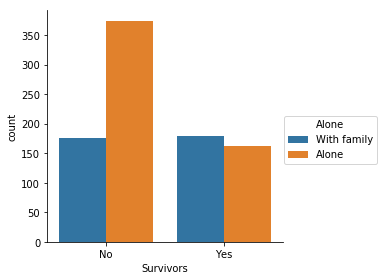

In [95]:
sns.factorplot('Survivors',data = titanic_df,hue = 'Alone',kind = 'count')

## __Conclusion on the Analysis__


#### Passengers were Male,Female and Child, the average age of a passenger was 30.

#### The maximum embarkment was from Southampton.

#### THe major population was in 3rd class and also male to female ratio was at the highest in 3rd class,possibly because of the workforce.

#### As per the data available , the majority of the population was travelling alone.Also,this might be the reason because they worked for the ship.

#### The survival rate was more inclined to the class 1 passengers compared to other two classes.

####  As per the survival graph, female passengers had higher chance of survival when compared to male passengers.

#### As Deck C was highly populated,the survival factor was more dependent on this Deck.

#### The chances of survival was towering towards passengers who travelled with family than the passengers who did not.